<a href="https://colab.research.google.com/github/Vonewman/Machine-Learning-with-Python-Zero-to-GBMs/blob/main/Logistic_Regression_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression for Classification

## Downloading the Data

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.version()

'0.1.22'

In [4]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [5]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vonewman
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 145MB/s]

In [6]:
import os

In [7]:
data_dir = './weather-dataset-rattle-package'

In [8]:
os.listdir(data_dir)

['weatherAUS.csv']

In [9]:
train_csv = data_dir + '/weatherAUS.csv'

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv(train_csv)

In [13]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

## Exploratory Data Analysis

In [16]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [20]:
px.histogram(df, x="Location", title="Location vs. Rainy Days", color='RainToday')

In [23]:
px.histogram(df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [24]:
px.histogram(df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [31]:
df.RainTomorrow.value_counts(normalize=True)

No     0.778382
Yes    0.221618
Name: RainTomorrow, dtype: float64

In [32]:
px.scatter(df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [34]:
px.scatter(df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

## (Optional) Working with a Sample

When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of `use_sample` to `True`.

In [39]:
use_sample = True  

In [40]:
sample_fraction = 0.1

In [41]:
if use_sample:
    df = df.sample(frac=sample_fraction).copy()

In [42]:
df.shape

(14079, 23)

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [45]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (8447, 23)
val_df.shape : (2816, 23)
test_df.shape : (2816, 23)


However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.

For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

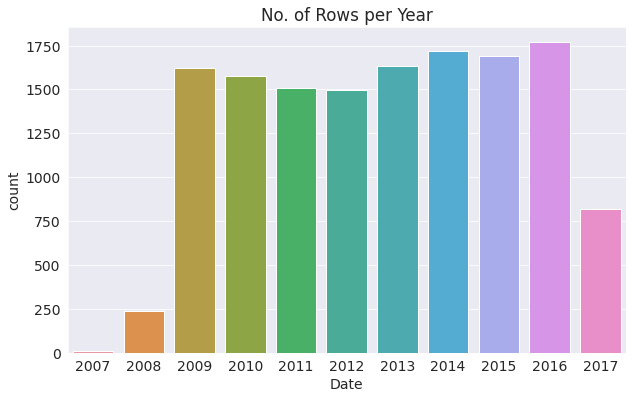

In [47]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [50]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [51]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (9803, 23)
val_df.shape : (1688, 23)
test_df.shape : (2588, 23)


While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [52]:
train_df

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
25758   2013-08-17       Penrith      6.3     24.2       0.0          NaN   
106419  2011-06-07       Woomera      9.2     17.7       0.0          2.0   
85655   2013-04-03      Brisbane     19.0     28.0       0.0          3.6   
9702    2010-10-07  CoffsHarbour     15.6     26.6       3.6          3.4   
81230   2009-08-21      Dartmoor      9.9     12.7       8.8          3.2   
...            ...           ...      ...      ...       ...          ...   
78242   2009-09-11      Watsonia      2.6     22.7       0.2          5.2   
59862   2013-11-14       Bendigo     10.4     19.1       0.2          1.6   
124123  2009-10-20    SalmonGums      2.7     22.9       0.0          NaN   
135070  2014-09-29    Launceston     10.6     17.3       3.2          NaN   
27766   2010-08-23      Richmond      8.4     14.4       0.8          8.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
25758        NaN          NW           52.0        NNW  ...        57.0   
106419       1.3         SSW           30.0         SE  ...        90.0   
85655        6.5         ESE           26.0        SSW  ...        70.0   
9702         8.8           S           37.0         NW  ...        75.0   
81230        7.9           W           80.0          W  ...        84.0   
...          ...         ...            ...        ...  ...         ...   
78242        9.1         NaN            NaN        NNE  ...        56.0   
59862        NaN          SW           43.0         SW  ...        73.0   
124123       NaN          SE           41.0        ESE  ...        54.0   
135070       NaN         NNW           48.0        NNW  ...        59.0   
27766        NaN         NNE           22.0        NNE  ...        92.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
25758          33.0          NaN          NaN       NaN       NaN     14.7   
106419         43.0       1023.3       1021.1       5.0       2.0     11.2   
85655          58.0       1017.7       1015.4       2.0       3.0     24.4   
9702           67.0       1015.4       1013.6       1.0       5.0     22.0   
81230          80.0        997.7       1001.3       NaN       NaN     10.0   
...             ...          ...          ...       ...       ...      ...   
78242          43.0       1016.7       1010.6       2.0       7.0     13.9   
59862          47.0       1017.3       1016.9       7.0       1.0     12.6   
124123         27.0          NaN          NaN       NaN       NaN     17.0   
135070         55.0          NaN          NaN       4.0       1.0     14.2   
27766          66.0       1017.2       1011.2       NaN       NaN     10.3   

        Temp3pm  RainToday  RainTomorrow  
25758      23.1         No            No  
106419     17.0         No            No  
85655      26.4         No           Yes  
9702       26.1        Yes           Yes  
81230       9.9        Yes           Yes  
...         ...        ...           ...  
78242      18.6         No            No  
59862      17.5         No            No  
124123     21.6         No            No  
135070     16.0        Yes            No  
27766      13.9         No            No  

[9803 rows x 23 columns]

In [53]:
val_df

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
80429   2015-12-05       Watsonia     14.1     32.2       0.0         10.4   
89498   2015-06-15         Cairns     21.4     27.0       6.8          2.0   
110889  2015-07-05         Albany     10.5     17.6       2.2          2.2   
35980   2015-12-25  SydneyAirport     17.6     26.6       0.0          7.0   
107665  2015-01-02        Woomera     23.6     43.3       0.0          NaN   
...            ...            ...      ...      ...       ...          ...   
32778   2015-06-15         Sydney     10.9     16.9       0.2          4.0   
143024  2015-02-19      Katherine     24.6     38.7       0.0          6.0   
108023  2015-12-26        Woomera     14.5     28.0       0.0         14.8   
117016  2015-10-22     PearceRAAF     11.5     25.9       0.0          NaN   
92677   2015-11-01      GoldCoast     16.2     27.3       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
80429        8.5          SW           31.0        SSW  ...        85.0   
89498        5.8         ESE           56.0        SSE  ...        85.0   
110889       6.3         NaN            NaN         SW  ...        88.0   
35980        9.6          NE           41.0        NNE  ...        50.0   
107665       NaN         NNE           46.0        NNE  ...         5.0   
...          ...         ...            ...        ...  ...         ...   
32778        0.6          NE           39.0        WNW  ...        85.0   
143024       NaN          SE           41.0          W  ...        70.0   
108023      11.9         SSW           65.0          S  ...        37.0   
117016       5.3           W           35.0        SSW  ...        77.0   
92677        NaN           N           39.0          N  ...        53.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
80429          35.0       1020.5       1017.2       7.0       3.0     18.0   
89498          68.0       1016.8       1014.3       7.0       5.0     24.2   
110889         65.0       1020.6       1019.2       6.0       6.0     12.0   
35980          40.0       1018.6       1015.3       5.0       4.0     22.8   
107665          3.0       1009.3       1006.4       NaN       NaN     35.1   
...             ...          ...          ...       ...       ...      ...   
32778          79.0       1027.8       1025.2       7.0       7.0     12.9   
143024         36.0       1006.4       1001.6       3.0       6.0     29.2   
108023         15.0       1014.1       1012.9       NaN       NaN     17.5   
117016         64.0       1014.1       1014.2       8.0       8.0     21.2   
92677          55.0       1020.5       1016.5       NaN       NaN     24.6   

        Temp3pm  RainToday  RainTomorrow  
80429      30.8         No            No  
89498      26.6        Yes           Yes  
110889     16.5        Yes            No  
35980      25.7         No            No  
107665     42.0         No            No  
...         ...        ...           ...  
32778      16.4         No           Yes  
143024     37.6         No            No  
108023     26.4         No            No  
117016     22.5         No            No  
92677      25.6         No            No  

[1688 rows x 23 columns]

In [54]:
test_df

Date    Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
129331  2016-02-05     Walpole     17.3     30.0       0.0          NaN   
145383  2017-04-10       Uluru     12.4     27.0       0.0          NaN   
39154   2016-06-07  WaggaWagga      7.9     11.8       2.6          0.8   
123630  2016-12-07       Perth     17.8     24.1       0.0          8.6   
123470  2016-06-30       Perth      5.0     18.4       0.0          2.4   
...            ...         ...      ...      ...       ...          ...   
145184  2016-09-23       Uluru     10.5     32.4       0.0          NaN   
2677    2016-06-28      Albury      2.5     11.8       0.2          NaN   
83784   2016-11-15    Dartmoor     10.0     16.8       0.8          NaN   
45233   2016-07-07  Wollongong     13.3     15.8      30.0          NaN   
108066  2016-02-07     Woomera     20.8     37.4       0.0         16.8   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
129331       NaN          NE           37.0         NW  ...        44.0   
145383       NaN           E           48.0        ESE  ...        48.0   
39154        NaN           W           39.0         NW  ...        90.0   
123630      11.3          SW           41.0        SSW  ...        64.0   
123470       9.3         SSE           22.0        SSW  ...        89.0   
...          ...         ...            ...        ...  ...         ...   
145184       NaN         NNW           54.0          E  ...        35.0   
2677         NaN           W           17.0          E  ...       100.0   
83784        NaN           W           30.0          W  ...        90.0   
45233        NaN           S           80.0         SW  ...        96.0   
108066      12.7          SE           50.0        SSE  ...        55.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
129331         46.0       1014.8       1015.1       NaN       NaN     27.2   
145383         24.0       1021.6       1016.9       NaN       NaN     17.4   
39154          92.0       1005.4       1005.3       8.0       8.0      9.5   
123630         45.0       1016.5       1015.7       5.0       0.0     20.7   
123470         47.0       1027.2       1024.7       1.0       1.0     11.1   
...             ...          ...          ...       ...       ...      ...   
145184         25.0       1011.4       1004.5       3.0       8.0     19.1   
2677           80.0       1026.9       1026.6       8.0       8.0      6.2   
83784          74.0       1021.5       1021.4       NaN       NaN     12.2   
45233          90.0       1016.2       1017.3       8.0       8.0     14.0   
108066         13.0       1015.3       1013.8       NaN       NaN     24.3   

        Temp3pm  RainToday  RainTomorrow  
129331     25.5         No            No  
145383     26.4         No            No  
39154      11.1        Yes           Yes  
123630     23.0         No            No  
123470     17.7         No            No  
...         ...        ...           ...  
145184     30.0         No            No  
2677       10.9         No            No  
83784      16.0         No            No  
45233      14.5        Yes           Yes  
108066     35.3         No            No  

[2588 rows x 23 columns]

## Identifying Input and Target Columns

Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the `Date` column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

Let's create a list of input columns, and also identify the target column.

In [67]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [68]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [69]:
target_col

'RainTomorrow'

We can now create inputs and targets for the training, validation and test sets for further processing and model training.

In [70]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [71]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [72]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [73]:
train_inputs

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
25758        Penrith      6.3     24.2       0.0          NaN       NaN   
106419       Woomera      9.2     17.7       0.0          2.0       1.3   
85655       Brisbane     19.0     28.0       0.0          3.6       6.5   
9702    CoffsHarbour     15.6     26.6       3.6          3.4       8.8   
81230       Dartmoor      9.9     12.7       8.8          3.2       7.9   
...              ...      ...      ...       ...          ...       ...   
78242       Watsonia      2.6     22.7       0.2          5.2       9.1   
59862        Bendigo     10.4     19.1       0.2          1.6       NaN   
124123    SalmonGums      2.7     22.9       0.0          NaN       NaN   
135070    Launceston     10.6     17.3       3.2          NaN       NaN   
27766       Richmond      8.4     14.4       0.8          8.8       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
25758           NW           52.0        NNW          W  ...          20.0   
106419         SSW           30.0         SE          S  ...          13.0   
85655          ESE           26.0        SSW          E  ...          11.0   
9702             S           37.0         NW         NE  ...          15.0   
81230            W           80.0          W        WSW  ...          30.0   
...            ...            ...        ...        ...  ...           ...   
78242          NaN            NaN        NNE        NNE  ...          20.0   
59862           SW           43.0         SW        SSW  ...          20.0   
124123          SE           41.0        ESE          S  ...           9.0   
135070         NNW           48.0        NNW        NNW  ...          30.0   
27766          NNE           22.0        NNE          N  ...          15.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
25758          57.0         33.0          NaN          NaN       NaN   
106419         90.0         43.0       1023.3       1021.1       5.0   
85655          70.0         58.0       1017.7       1015.4       2.0   
9702           75.0         67.0       1015.4       1013.6       1.0   
81230          84.0         80.0        997.7       1001.3       NaN   
...             ...          ...          ...          ...       ...   
78242          56.0         43.0       1016.7       1010.6       2.0   
59862          73.0         47.0       1017.3       1016.9       7.0   
124123         54.0         27.0          NaN          NaN       NaN   
135070         59.0         55.0          NaN          NaN       4.0   
27766          92.0         66.0       1017.2       1011.2       NaN   

        Cloud3pm  Temp9am  Temp3pm  RainToday  
25758        NaN     14.7     23.1         No  
106419       2.0     11.2     17.0         No  
85655        3.0     24.4     26.4         No  
9702         5.0     22.0     26.1        Yes  
81230        NaN     10.0      9.9        Yes  
...          ...      ...      ...        ...  
78242        7.0     13.9     18.6         No  
59862        1.0     12.6     17.5         No  
124123       NaN     17.0     21.6         No  
135070       1.0     14.2     16.0        Yes  
27766        NaN     10.3     13.9         No  

[9803 rows x 21 columns]

In [74]:
train_targets

25758      No
106419     No
85655     Yes
9702      Yes
81230     Yes
         ... 
78242      No
59862      No
124123     No
135070     No
27766      No
Name: RainTomorrow, Length: 9803, dtype: object

In [75]:
import numpy as np

In [76]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

Let's view some statistics for the numeric columns.

In [77]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9775.000000  9780.000000  9803.000000  6147.000000  5766.000000   
mean     11.917299    22.877025     2.441957     5.295852     7.570604   
std       6.325903     7.081941     8.515129     4.005224     3.795187   
min      -6.400000    -3.100000     0.000000     0.000000     0.000000   
25%       7.400000    17.700000     0.000000     2.600000     4.800000   
50%      11.700000    22.200000     0.000000     4.600000     8.400000   
75%      16.500000    27.900000     0.800000     7.200000    10.600000   
max      28.600000    46.400000   206.800000    77.300000    14.100000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9110.000000   9721.000000   9700.000000  9714.000000  9701.000000   
mean       40.555763     14.284539     18.944639    68.626210    51.769199   
std        13.994750      8.978741      8.888904    19.083683    20.833627   
min         7.000000      0.000000      0.000000     2.000000     1.000000   
25%        31.000000      7.000000     13.000000    57.000000    37.000000   
50%        39.000000     13.000000     19.000000    70.000000    52.000000   
75%        48.000000     20.000000     24.000000    83.000000    66.000000   
max       126.000000     67.000000     72.000000   100.000000   100.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  8879.000000  8878.000000  6309.000000  6224.000000  9753.000000   
mean   1017.524631  1015.139052     4.344270     4.431234    16.752497   
std       7.138330     7.032873     2.851432     2.690965     6.458389   
min     984.600000   985.300000     0.000000     0.000000    -4.800000   
25%    1012.800000  1010.300000     1.000000     2.000000    12.000000   
50%    1017.600000  1015.100000     5.000000     5.000000    16.400000   
75%    1022.300000  1020.000000     7.000000     7.000000    21.300000   
max    1040.200000  1037.300000     8.000000     8.000000    38.000000   

           Temp3pm  
count  9749.000000  
mean     21.392563  
std       6.909847  
min      -3.900000  
25%      16.300000  
50%      20.700000  
75%      26.100000  
max      44.900000

Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

Let's also check the number of categories in each of the categorical columns.

In [78]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
imputer = SimpleImputer(strategy='mean')

In [82]:
df[numeric_cols].isna().sum()

MinTemp            40
MaxTemp            31
Rainfall            0
Evaporation      5964
Sunshine         6730
WindGustSpeed     932
WindSpeed9am      101
WindSpeed3pm      257
Humidity9am       149
Humidity3pm       365
Pressure9am      1390
Pressure3pm      1394
Cloud9am         5228
Cloud3pm         5593
Temp9am            59
Temp3pm           276
dtype: int64

In [83]:
train_inputs[numeric_cols].isna().sum()

MinTemp            28
MaxTemp            23
Rainfall            0
Evaporation      3656
Sunshine         4037
WindGustSpeed     693
WindSpeed9am       82
WindSpeed3pm      103
Humidity9am        89
Humidity3pm       102
Pressure9am       924
Pressure3pm       925
Cloud9am         3494
Cloud3pm         3579
Temp9am            50
Temp3pm            54
dtype: int64

The first step in imputation is to `fit` the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset. 

In [85]:
imputer.fit(df[numeric_cols])

SimpleImputer()

After calling `fit`, the computed statistic for each column is stored in the `statistics_` property of `imputer`.

In [86]:
list(imputer.statistics_)

[12.120849063323599,
 23.142504271070617,
 2.3551956815114714,
 5.470646950092422,
 7.612178527690841,
 40.30075302350346,
 14.093861782801545,
 18.759803212270295,
 68.80143575017946,
 51.74092168586846,
 1017.6200488612185,
 1015.2144974379187,
 4.451926336007231,
 4.500235682300259,
 16.92857346647646,
 21.58938636528291]

The missing values in the training, test and validation sets can now be filled in using the `transform` method of `imputer`.

In [87]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [88]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [90]:
df[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall  Evaporation     Sunshine  \
count  14039.000000  14048.000000  14079.000000  8115.000000  7349.000000   
mean      12.120849     23.142504      2.355196     5.470647     7.612179   
std        6.402524      7.213123      8.276975     4.172503     3.776318   
min       -6.800000     -3.100000      0.000000     0.000000     0.000000   
25%        7.500000     17.800000      0.000000     2.600000     4.900000   
50%       11.900000     22.500000      0.000000     4.800000     8.400000   
75%       16.800000     28.300000      0.800000     7.400000    10.600000   
max       30.700000     46.600000    225.000000    77.300000    14.100000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   13147.000000  13978.000000  13822.000000  13930.000000  13714.000000   
mean       40.300753     14.093862     18.759803     68.801436     51.740922   
std        13.834097      8.854063      8.811849     19.230014     20.914693   
min         7.000000      0.000000      0.000000      2.000000      1.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     20.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     74.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm     Cloud9am     Cloud3pm       Temp9am  \
count  12689.000000  12685.000000  8851.000000  8486.000000  14020.000000   
mean    1017.620049   1015.214497     4.451926     4.500236     16.928573   
std        7.168657      7.084740     2.875030     2.718311      6.560784   
min      982.200000    982.600000     0.000000     0.000000     -4.800000   
25%     1012.900000   1010.300000     1.000000     2.000000     12.100000   
50%     1017.600000   1015.100000     5.000000     5.000000     16.600000   
75%     1022.300000   1020.100000     7.000000     7.000000     21.600000   
max     1040.300000   1037.300000     8.000000     8.000000     38.000000   

            Temp3pm  
count  13803.000000  
mean      21.589386  
std        7.011847  
min       -3.900000  
25%       16.400000  
50%       21.000000  
75%       26.400000  
max       45.200000

Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

First, we `fit` the scaler to the data i.e. compute the range of values for each numeric column.

In [93]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

We can now inspect the minimum and maximum values in each column.

In [94]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-6.8,
 -3.1,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 2.0,
 1.0,
 982.2,
 982.6,
 0.0,
 0.0,
 -4.8,
 -3.9]

In [95]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[30.7,
 46.6,
 225.0,
 77.3,
 14.1,
 135.0,
 87.0,
 74.0,
 100.0,
 100.0,
 1040.3,
 1037.3,
 8.0,
 8.0,
 38.0,
 45.2]

We can now separately scale the training, validation and test sets using the `transform` method of `scaler`.

In [96]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

We can now verify that values in each column lie in the range $(0,1)$

In [97]:
train_inputs[numeric_cols].describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  9803.000000  9803.000000  9803.000000  9803.000000  9803.000000   
mean      0.499143     0.522689     0.010853     0.069354     0.538136   
std       0.168450     0.142327     0.037845     0.041043     0.206427   
min       0.010667     0.000000     0.000000     0.000000     0.000000   
25%       0.378667     0.418511     0.000000     0.049159     0.535461   
50%       0.496000     0.509054     0.000000     0.070772     0.539871   
75%       0.621333     0.621730     0.003556     0.072445     0.652482   
max       0.944000     0.995976     0.919111     1.000000     1.000000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    9803.000000   9803.000000   9803.000000  9803.000000  9803.000000   
mean        0.262014      0.164172      0.255982     0.679876     0.512817   
std         0.105399      0.102772      0.119488     0.193845     0.209343   
min         0.000000      0.000000      0.000000     0.000000     0.000000   
25%         0.187500      0.080460      0.175676     0.561224     0.363636   
50%         0.250000      0.149425      0.256757     0.683673     0.515152   
75%         0.320312      0.229885      0.324324     0.826531     0.656566   
max         0.929688      0.770115      0.972973     1.000000     1.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  9803.000000  9803.000000  9803.000000  9803.000000  9803.000000   
mean      0.608152     0.594994     0.547830     0.557053     0.503584   
std       0.116930     0.122356     0.286004     0.268048     0.150512   
min       0.041308     0.049360     0.000000     0.000000     0.000000   
25%       0.537005     0.517367     0.375000     0.375000     0.392523   
50%       0.609639     0.596243     0.556491     0.562529     0.497664   
75%       0.681583     0.672761     0.750000     0.750000     0.609813   
max       0.998279     1.000000     1.000000     1.000000     1.000000   

           Temp3pm  
count  9803.000000  
mean      0.515146  
std       0.140342  
min       0.000000  
25%       0.411405  
50%       0.503055  
75%       0.608961  
max       0.993890

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column. 

In [98]:
df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

First, we `fit` the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [102]:
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [104]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

The encoder has created a list of categories for each of the categorical columns in the dataset. 

We can generate column names for each individual category using `get_feature_names`.

In [106]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

All of the above columns will be added to `train_inputs`, `val_inputs` and `test_inputs`.

To perform the encoding, we use the `transform` method of `encoder`.

In [107]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented 

We can verify that these new columns have been added to our training, test and validation sets.

In [108]:
pd.set_option('display.max_columns', None)

In [109]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
129331     Walpole  0.642667  0.665996  0.000000     0.070772  0.539871   
145383       Uluru  0.512000  0.605634  0.000000     0.070772  0.539871   
39154   WaggaWagga  0.392000  0.299799  0.011556     0.010349  0.539871   
123630       Perth  0.656000  0.547284  0.000000     0.111255  0.801418   
123470       Perth  0.314667  0.432596  0.000000     0.031048  0.659574   
...            ...       ...       ...       ...          ...       ...   
145184       Uluru  0.461333  0.714286  0.000000     0.070772  0.539871   
2677        Albury  0.248000  0.299799  0.000889     0.070772  0.539871   
83784     Dartmoor  0.448000  0.400402  0.003556     0.070772  0.539871   
45233   Wollongong  0.536000  0.380282  0.133333     0.070772  0.539871   
108066     Woomera  0.736000  0.814889  0.000000     0.217335  0.900709   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
129331          NE       0.234375         NW          S      0.229885   
145383           E       0.320312        ESE        ESE      0.344828   
39154            W       0.250000         NW          W      0.229885   
123630          SW       0.265625        SSW         SW      0.218391   
123470         SSE       0.117188        SSW        SSE      0.022989   
...            ...            ...        ...        ...           ...   
145184         NNW       0.367188          E         NW      0.080460   
2677             W       0.078125          E        WSW      0.080460   
83784            W       0.179688          W         SW      0.068966   
45233            S       0.570312         SW         SW      0.252874   
108066          SE       0.335938        SSE          S      0.218391   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
129331      0.175676     0.428571     0.454545     0.561102     0.594150   
145383      0.270270     0.469388     0.232323     0.678141     0.627057   
39154       0.175676     0.897959     0.919192     0.399312     0.414991   
123630      0.256757     0.632653     0.444444     0.590361     0.605119   
123470      0.094595     0.887755     0.464646     0.774527     0.769653   
...              ...          ...          ...          ...          ...   
145184      0.405405     0.336735     0.242424     0.502582     0.400366   
2677        0.081081     1.000000     0.797980     0.769363     0.804388   
83784       0.256757     0.897959     0.737374     0.676420     0.709324   
45233       0.324324     0.959184     0.898990     0.585198     0.634369   
108066      0.229730     0.540816     0.121212     0.569707     0.570384   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
129331  0.556491  0.562529  0.747664  0.598778        No                0.0   
145383  0.556491  0.562529  0.518692  0.617108        No                0.0   
39154   1.000000  1.000000  0.334112  0.305499       Yes                0.0   
123630  0.625000  0.000000  0.595794  0.547862        No                0.0   
123470  0.125000  0.125000  0.371495  0.439919        No                0.0   
...          ...       ...       ...       ...       ...                ...   
145184  0.375000  1.000000  0.558411  0.690428        No                0.0   
2677    1.000000  1.000000  0.257009  0.301426        No                0.0   
83784   0.556491  0.562529  0.397196  0.405295        No                0.0   
45233   1.000000  1.000000  0.439252  0.374745       Yes                0.0   
108066  0.556491  0.562529  0.679907  0.798371        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
129331              0.0              0.0                    0.0   
145383              0.0              0.0                    0.0   
39154               0.0              0.0                    0.0   
123630              0.0              0.0                    0.0   
123470              0.0            

## Saving Processed Data to Disk

It can be useful to save processed data to disk, especially for really large datasets, to avoid repeating the preprocessing steps every time you start the Jupyter notebook. The parquet format is a fast and efficient format for saving and loading Pandas dataframes.

In [110]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9803, 123)
train_targets: (9803,)
val_inputs: (1688, 123)
val_targets: (1688,)
test_inputs: (2588, 123)
test_targets: (2588,)


In [111]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [112]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 10.7 ms, sys: 3.07 ms, total: 13.8 ms
Wall time: 15.6 ms


In [113]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 97.1 ms, sys: 26.1 ms, total: 123 ms
Wall time: 155 ms


Let's verify that the data was loaded properly.

In [114]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (9803, 123)
train_targets: (9803,)
val_inputs: (1688, 123)
val_targets: (1688,)
test_inputs: (2588, 123)
test_targets: (2588,)


In [115]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
80429        Watsonia  0.557333  0.710262  0.000000     0.134541  0.602837   
89498          Cairns  0.752000  0.605634  0.030222     0.025873  0.411348   
110889         Albany  0.461333  0.416499  0.009778     0.028461  0.446809   
35980   SydneyAirport  0.650667  0.597586  0.000000     0.090556  0.680851   
107665        Woomera  0.810667  0.933602  0.000000     0.070772  0.539871   
...               ...       ...       ...       ...          ...       ...   
32778          Sydney  0.472000  0.402414  0.000889     0.051746  0.042553   
143024      Katherine  0.837333  0.841046  0.000000     0.077620  0.539871   
108023        Woomera  0.568000  0.625755  0.000000     0.191462  0.843972   
117016     PearceRAAF  0.488000  0.583501  0.000000     0.070772  0.375887   
92677       GoldCoast  0.613333  0.611670  0.000000     0.070772  0.539871   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
80429           SW       0.187500        SSW        SSW      0.045977   
89498          ESE       0.382812        SSE         SE      0.172414   
110889        None       0.260162         SW         SW      0.126437   
35980           NE       0.265625        NNE        ENE      0.103448   
107665         NNE       0.304688        NNE        NNE      0.321839   
...            ...            ...        ...        ...           ...   
32778           NE       0.250000        WNW          W      0.149425   
143024          SE       0.265625          W         SE      0.080460   
108023         SSW       0.453125          S          S      0.448276   
117016           W       0.218750        SSW          W      0.080460   
92677            N       0.250000          N        NNE      0.195402   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
80429       0.202703     0.846939     0.343434     0.659208     0.632541   
89498       0.324324     0.846939     0.676768     0.595525     0.579525   
110889      0.148649     0.877551     0.646465     0.660929     0.669104   
35980       0.378378     0.489796     0.393939     0.626506     0.597806   
107665      0.270270     0.030612     0.020202     0.466437     0.435101   
...              ...          ...          ...          ...          ...   
32778       0.121622     0.846939     0.787879     0.784854     0.778793   
143024      0.270270     0.693878     0.353535     0.416523     0.347349   
108023      0.445946     0.357143     0.141414     0.549053     0.553931   
117016      0.297297     0.765306     0.636364     0.549053     0.577697   
92677       0.418919     0.520408     0.545455     0.659208     0.619744   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
80429   0.875000  0.375000  0.532710  0.706721        No                0.0   
89498   0.875000  0.625000  0.677570  0.621181       Yes                0.0   
110889  0.750000  0.750000  0.392523  0.415479       Yes                0.0   
35980   0.625000  0.500000  0.644860  0.602851        No                0.0   
107665  0.556491  0.562529  0.932243  0.934827        No                0.0   
...          ...       ...       ...       ...       ...                ...   
32778   0.875000  0.875000  0.413551  0.413442        No                0.0   
143024  0.375000  0.750000  0.794393  0.845214        No                0.0   
108023  0.556491  0.562529  0.521028  0.617108        No                0.0   
117016  1.000000  1.000000  0.607477  0.537678        No                0.0   
92677   0.556491  0.562529  0.686916  0.600815        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
80429               0.0              0.0                    0.0   
89498               0.0              0.0                    0.0   
110889              1.0              0.0                    0.0   
35980               0.0              0.0                    0.0   
10

In [116]:
val_targets

80429      No
89498     Yes
110889     No
35980      No
107665     No
         ... 
32778     Yes
143024     No
108023     No
117016     No
92677      No
Name: RainTomorrow, Length: 1688, dtype: object

## Training a Logistic Regression Model

Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model: 

- we take linear combination (or weighted sum of the input features) 
- we apply the sigmoid function to the result to obtain a number between 0 and 1
- this number represents the probability of the input being classified as "Yes"
- instead of RMSE, the cross entropy loss function is used to evaluate the results


Here's a visual summary of how a logistic regression model is structured ([source](http://datahacker.rs/005-pytorch-logistic-regression-in-pytorch/)):


<img src="https://i.imgur.com/YMaMo5D.png" width="480">

The sigmoid function applied to the linear combination of inputs has the following formula:

<img src="https://i.imgur.com/sAVwvZP.png" width="400">

To train a logistic regression model, we can use the `LogisticRegression` class from Scikit-learn.

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression(solver='liblinear')

In [119]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">

For a mathematical discussion of logistic regression, sigmoid activation and cross entropy, check out [this YouTube playlist](https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy&index=1). Logistic regression can also be applied to multi-class classification problems, with a few modifications.

In [120]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [123]:
print(model.coef_.tolist())

[[0.4966426772907049, -0.4588447627394261, 1.389419861111156, 0.4531433821828244, -1.4532501776827191, 5.234631824155427, -0.15819922027282332, -0.5561861480536867, 0.4945243764196634, 5.1946766109757325, 1.02835060751671, -4.610398737071866, -0.17356809808620766, 1.3954077266638667, -0.4247444154241807, 0.6370809013193555, 0.5216171616016645, -0.34486446815687855, 0.39717513798087284, 0.4183325209526691, -0.05768443032760026, -0.5339187910342735, -0.06082100743220932, 0.22019293660408815, -0.014525569873664285, 0.11247847079432916, 0.027737340552405843, 0.023104448132359092, -0.061757283926713785, -0.34962210792273724, 0.12555833269275074, -0.49840998610895343, -0.4074554034122374, -0.15538249564914797, -0.06529762902028081, -0.8805175020436282, -0.01634648097366659, 0.0471079843314746, 0.24774765830117534, -0.3118991748038059, -0.20167966109816574, -0.024871495109888942, -0.27173551723161793, -0.43233072231798103, -0.23951538786934776, 0.19741570462220395, 0.4750016407975097, 0.81564

In [124]:
print(model.intercept_)

[-2.24668935]


Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

## Making Predictions and Evaluating the Model

We can now use the trained model to make predictions on the training, test 

In [125]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [126]:
train_preds = model.predict(X_train)

In [127]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [128]:
train_targets

25758      No
106419     No
85655     Yes
9702      Yes
81230     Yes
         ... 
78242      No
59862      No
124123     No
135070     No
27766      No
Name: RainTomorrow, Length: 9803, dtype: object

We can output a probabilistic prediction using `predict_proba`.

In [129]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.90882599, 0.09117401],
       [0.95915889, 0.04084111],
       [0.8596322 , 0.1403678 ],
       ...,
       [0.95349542, 0.04650458],
       [0.7909498 , 0.2090502 ],
       [0.70328265, 0.29671735]])

The numbers above indicate the probabilities for the target classes "No" and "Yes".

In [130]:
model.classes_

array(['No', 'Yes'], dtype=object)

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
accuracy_score(train_targets, train_preds)

0.8465775782923595

The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

In [133]:
from sklearn.metrics import confusion_matrix

In [134]:
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.9436489 , 0.0563511 ],
       [0.47722247, 0.52277753]])

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [135]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 84.66%


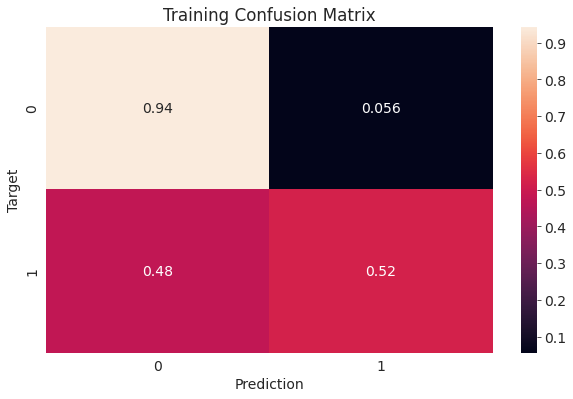

In [136]:
train_preds = predict_and_plot(X_train, train_targets, 'Training')

Let's compute the model's accuracy on the validation and test sets too.

Accuracy: 85.25%


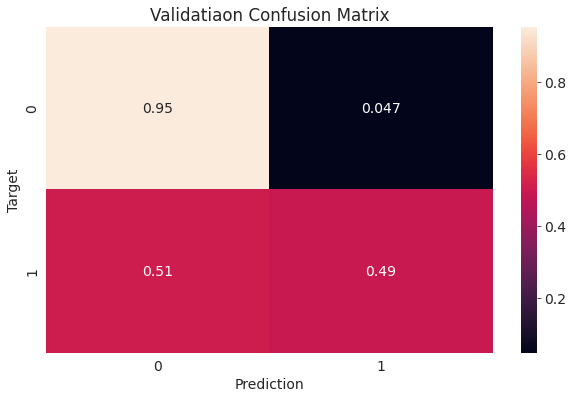

In [137]:
val_preds = predict_and_plot(X_val, val_targets, 'Validatiaon')

Accuracy: 84.16%


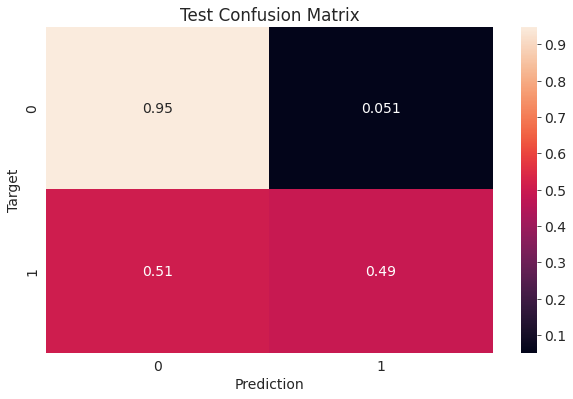

In [138]:
test_preds = predict_and_plot(X_test, test_targets, 'Test')

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [139]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [140]:
def all_no(inputs):
    return np.full(len(inputs), "No")

Let's check the accuracies of these two models on the test set.

In [141]:
accuracy_score(test_targets, random_guess(X_test))

0.49149922720247297

In [142]:
accuracy_score(test_targets, all_no(X_test))

0.7658423493044823

## Making Predictions on a Single Input

Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [143]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [144]:
new_input_df = pd.DataFrame([new_input])

In [145]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

We've now created a Pandas dataframe with the same columns as `raw_df` (except `RainTomorrow`, which needs to be predicted). The dataframe contains just one row of data, containing the given input.


We must now apply the same transformations applied while training the model:

1. Imputation of missing values using the `imputer` created earlier
2. Scaling numerical features using the `scaler` created earlier
3. Encoding categorical features using the `encoder` created earlier

In [146]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [147]:
X_new_input = new_input_df[numeric_cols + encoded_cols]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0      0.8  0.730382  0.045333     0.054334  0.539871       0.351562   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0      0.149425       0.27027     0.887755     0.575758     0.388985   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0     0.345521       1.0     0.625  0.712617  0.751527                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0            

We can now make a prediction using `model.predict`.

In [148]:
prediction = model.predict(X_new_input)[0]

In [149]:
prediction

'Yes'

Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [150]:
prob = model.predict_proba(X_new_input)[0]

In [151]:
prob

array([0.39798893, 0.60201107])

Looks like our model isn't too confident about its prediction!
Let's define a helper function to make predictions for individual inputs.

In [152]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

We can now use this function to make predictions for individual inputs.

In [153]:
predict_input(new_input)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



('Yes', 0.6020110652395492)